In [2]:
print("Hello world")

Hello world


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas
import matplotlib.pyplot as plt
import seaborn 
import numpy

In [5]:
data = pandas.read_csv( "drive/MyDrive/UAE Coronavirus Dataset FCSA.csv" )

In [6]:
data

,Day,Date,Cases,Recovered,Deaths,Tests,Active,Vaccine
0,1,1/29/2020,4,0,0,75,4,0
1,2,2/1/2020,1,0,0,183,5,0
2,3,2/8/2020,2,0,0,574,7,0
3,4,2/9/2020,0,1,0,1360,6,0
4,5,2/10/2020,1,0,0,437,7,0
...,...,...,...,...,...,...,...,...
383,384,3/18/2021,2101,2628,10,198328,16936,150097
384,385,3/19/2021,2160,2391,4,239268,16701,143680
385,386,3/20/2021,2013,2240,5,240035,16469,56910
386,387,3/21/2021,1717,1960,5,237479,16221,117712


In [7]:
data.describe()

,Day,Cases,Recovered,Deaths,Tests,Active,Vaccine
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,194.500000,1139.757732,1094.948454,3.724227,91692.556701,11325.311856,19007.023196
std,112.150197,1024.664030,1149.939667,4.178663,61781.076806,7167.593829,57142.197004
min,1.000000,0.000000,0.000000,0.000000,75.000000,4.000000,0.000000
25%,97.750000,390.750000,324.500000,1.000000,40723.000000,6386.000000,0.000000
50%,194.500000,817.000000,692.500000,2.000000,82133.500000,10048.000000,0.000000
75%,291.250000,1315.500000,1516.250000,5.000000,139162.750000,16113.250000,0.000000
max,388.000000,3977.000000,5059.000000,20.000000,244459.000000,27792.000000,826301.000000


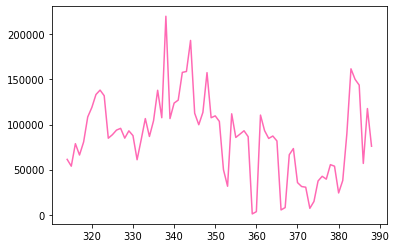

In [8]:
plt.plot( data["Day"][-75:] , data['Vaccine'][-75:] , 'hotpink')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


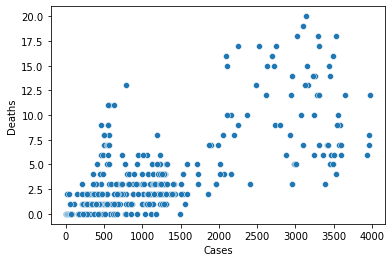

In [9]:
seaborn.scatterplot( data['Cases'],data['Deaths'] )

In [10]:
x = data[ [ 'Recovered','Active', 'Tests' ] ]
y= data['Cases']

In [11]:
print(y)

0         4
1         1
2         2
3         0
4         1
       ... 
383    2101
384    2160
385    2013
386    1717
387    1871
Name: Cases, Length: 388, dtype: int64


In [12]:
# Syllabus will be the first 310 values -> 80% of my data was the syllabus
#Train test split
xtrain= x[:310]
xtest = x[310:]
ytrain = y[:310]
ytest = y[310:]

In [13]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)  #TRy other numbers

In [14]:
model.fit(xtrain,ytrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
pred = model.predict(xtest)

In [16]:
pred

array([1455.78906942, 1704.70115905, 1822.67916068, 2303.39927758,
       1885.49429949, 1920.95787143, 2002.32489512, 1722.01518131,
       1818.53008234, 1852.99122324, 1839.90002461, 2022.40946373,
       2123.41939153, 2235.3361655 , 2041.34453259, 2260.24733158,
       2391.36121114, 2437.09132263, 2488.55104761, 2535.77691154,
       2593.01736218, 2263.20288483, 2479.91234191, 2665.88552619,
       2259.56611532, 2240.97207842, 2204.29248061, 2630.78171639,
       2369.89164456, 2468.69993515, 2511.42230282, 2351.66630116,
       2286.24844441, 2345.86523463, 2762.19974434, 2270.63100212,
       2193.41233335, 2089.58552175, 2392.80109469, 2199.62169457,
       2362.69499334, 2924.1245948 , 2598.44670177, 2378.63636714,
       2313.73668302, 2190.2061214 , 2448.21536906, 2396.11017767,
       2375.09007972, 2024.30981051, 2175.65774026, 2282.56880751,
       2626.17599824, 1907.89788535, 1817.64841741, 1862.10456984,
       1459.24508436, 1929.13063965, 1878.34994985, 2020.61284

In [17]:
from sklearn import metrics

In [18]:
print(metrics.mean_squared_error(ytest,pred))

872494.7305570787


In [19]:
print(metrics.mean_absolute_error(ytest,pred))

799.4518079721994


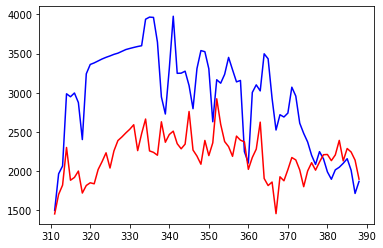

In [20]:
plt.plot(data['Day'][310:], data['Cases'][310:],"blue")
plt.plot(data['Day'][310:], pred, "red")
plt.show()

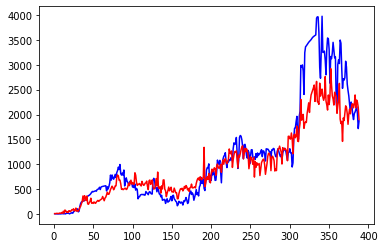

In [21]:
pred = model.predict(x)
plt.plot(data['Day'], data['Cases'],"blue")
plt.plot(data['Day'], pred, "red")
plt.show()

In [23]:
input=numpy.array( [2348,15759,209079] ).reshape(1,-1)
model.predict(input) 

array([2094.2635247])

# Predicted next days cases to within 100 cases!